# Clustering Analysis on Stock Returns

In [1]:
# We study the clustering analysis on stock returns. The data set can be
# found in the following link:
# https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231
#
# We adopt K-Means and spectral clustering methods to group the stocks
# based on their log-return properties. In addition, we represent the 
# the correlation relationship as the graph form. This can manifest 
# the relationship between the stocks.
#
# Reference: M.J. Bennett and D.L. Hugen, "Financial Analytics with R",
#            Cambridge University Press (2016).   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
df=pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
df=df.drop(['Open','High','Low','Volume'],axis=1)

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 3 columns):
Date     93612 non-null datetime64[ns]
Close    93612 non-null float64
Name     93612 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.1+ MB


In [8]:
df.head()

,Date,Close,Name
0,2006-01-03,79.11,MMM
1,2006-01-04,78.71,MMM
2,2006-01-05,77.99,MMM
3,2006-01-06,78.63,MMM
4,2006-01-09,79.02,MMM


In [9]:
df=df.pivot(index='Date',columns='Name',values='Close')

In [10]:
df.head()

Name,AABA,AAPL,AMZN,AXP,BA,CAT,CSCO,CVX,DIS,GE,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,40.91,10.68,47.58,52.58,70.44,57.80,17.45,59.08,24.40,35.37,...,26.84,10.74,23.78,58.78,45.99,61.73,56.53,30.38,46.23,58.47
2006-01-04,40.97,10.71,47.25,51.95,71.17,59.27,17.85,58.91,23.99,35.32,...,26.97,10.69,24.55,58.89,46.50,61.88,56.19,31.27,46.32,58.57
2006-01-05,41.53,10.63,47.65,52.50,70.33,59.27,18.35,58.19,24.41,35.23,...,26.99,10.76,24.58,58.70,46.95,61.69,55.98,31.63,45.69,58.28
2006-01-06,43.21,10.90,47.87,52.68,69.35,60.45,18.77,59.25,24.74,35.47,...,26.91,10.72,24.85,58.64,47.21,62.90,56.16,31.35,45.88,59.43
2006-01-09,43.42,10.86,47.08,53.99,68.77,61.55,19.06,58.95,25.00,35.38,...,26.86,10.88,24.85,59.08,47.23,61.40,56.80,31.48,45.71,59.40


In [11]:
df=df.fillna(method='ffill')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 31 columns):
AABA     3020 non-null float64
AAPL     3020 non-null float64
AMZN     3020 non-null float64
AXP      3020 non-null float64
BA       3020 non-null float64
CAT      3020 non-null float64
CSCO     3020 non-null float64
CVX      3020 non-null float64
DIS      3020 non-null float64
GE       3020 non-null float64
GOOGL    3020 non-null float64
GS       3020 non-null float64
HD       3020 non-null float64
IBM      3020 non-null float64
INTC     3020 non-null float64
JNJ      3020 non-null float64
JPM      3020 non-null float64
KO       3020 non-null float64
MCD      3020 non-null float64
MMM      3020 non-null float64
MRK      3020 non-null float64
MSFT     3020 non-null float64
NKE      3020 non-null float64
PFE      3020 non-null float64
PG       3020 non-null float64
TRV      3020 non-null float64
UNH      3020 non-null float64
UTX      3020 non-null float64
VZ     

In [13]:
returns = np.log(df/df.shift(1))

In [14]:
returns = returns.dropna()

In [15]:
year = [str(2006+i) for i in range(12)]

In [16]:
meanstd_returns = pd.DataFrame()
for i in returns.columns:
    for j in year:
        meanstd_returns.loc[i,'mean_'+j] = returns.loc[j,i].mean()
    for j in year:
        meanstd_returns.loc[i,'std_'+j] = returns.loc[j,i].std()*np.sqrt(df[j].shape[0])

In [17]:
meanstd_returns.head()

,mean_2006,mean_2007,mean_2008,mean_2009,mean_2010,mean_2011,mean_2012,mean_2013,mean_2014,mean_2015,...,std_2008,std_2009,std_2010,std_2011,std_2012,std_2013,std_2014,std_2015,std_2016,std_2017
AABA,-0.001885,-0.000373,-0.002551,0.001265,-0.000036,-0.000121,0.000840,0.002814,0.000882,-0.001658,...,0.756512,0.423732,0.294455,0.394806,0.200921,0.279006,0.318525,0.309392,0.294646,0.212714
AAPL,0.000506,0.003379,-0.003329,0.003587,0.001690,0.000903,0.001092,0.000210,0.001270,-0.000188,...,0.588287,0.336742,0.267038,0.262751,0.292472,0.288978,0.216886,0.267453,0.234040,0.175673
AMZN,-0.000749,0.003400,-0.002338,0.003827,0.001156,-0.000155,0.001484,0.001839,-0.000995,0.003089,...,0.657198,0.503507,0.326556,0.387495,0.310783,0.269021,0.328233,0.326731,0.296565,0.204486
AXP,0.000572,-0.000613,-0.004076,0.003100,0.000228,0.000375,0.000791,0.001811,0.000100,-0.001155,...,0.732876,0.737779,0.328637,0.303975,0.201473,0.179252,0.178812,0.214334,0.249468,0.130766
BA,0.000928,-0.000062,-0.002837,0.000944,0.000742,0.000464,0.000108,0.002357,-0.000194,0.000423,...,0.478897,0.399192,0.299638,0.307343,0.186289,0.211693,0.194204,0.216958,0.243884,0.175033


# K-Means Clustering

In [18]:
# Scale the data with zero mean and unit standard deviation
from sklearn.preprocessing import scale
scale_returns = scale(meanstd_returns)

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [20]:
# Set the number of cluster size for testing
Cluster_size=[3, 5,10, 15,20,25,30]

In [21]:
# Function for evaluating inertia and silhouette to 
# characterize the clustering performance
def Cluster_size_evaluation(Cluster_size,data):
    inertia=[]
    silhouette=[]
    sample_size=5000
    for i in Cluster_size:
        model=KMeans(n_clusters=i,max_iter=2000,tol=5e-5)
        model.fit(data)
        # Intertia
        inertia.append(model.inertia_)
        # Silhouette Score
        silhouette.append(metrics.silhouette_score(data, model.labels_,metric='euclidean',sample_size=sample_size))
    return inertia,silhouette

In [22]:
KM_inertia,KM_silhouette=Cluster_size_evaluation(Cluster_size,scale_returns)

In [23]:
# Function for plotting the clustering performance
def plotting_Cluster_size_evaluation(inertia,silhouette):
    plt.figure(figsize=(8,12))
    plt.subplot(211)
    plt.plot(Cluster_size,inertia)
    plt.scatter(Cluster_size,inertia)
    plt.title("Inertia")
    plt.ylabel("Inertia")
    plt.xlabel("Cluster Size")
    plt.subplot(212)
    plt.plot(Cluster_size,silhouette)
    plt.scatter(Cluster_size,silhouette)
    plt.title("Silhoutte Score")
    plt.ylabel("Silhoutte Score")
    plt.xlabel("Cluster Size")
    plt.tight_layout()

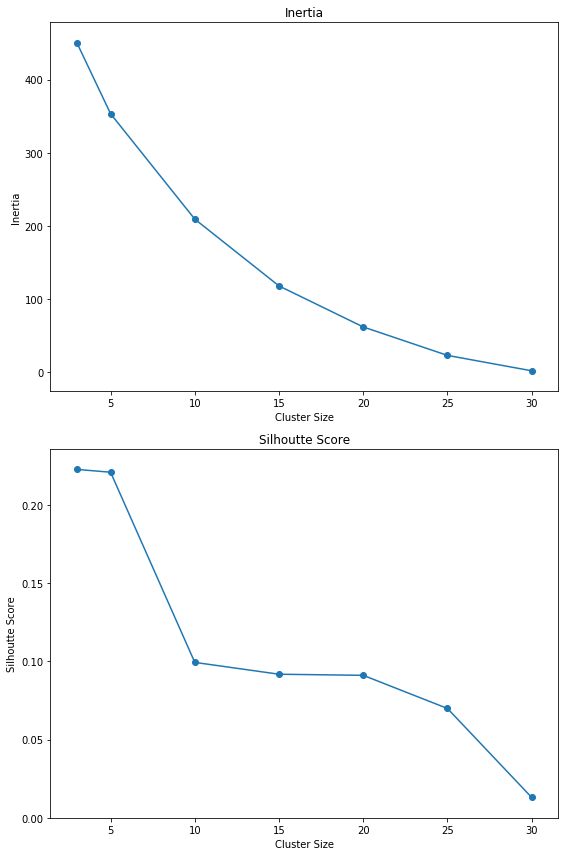

In [24]:
plotting_Cluster_size_evaluation(KM_inertia,KM_silhouette)

In [25]:
# We group the stocks into 5 different groups
model=KMeans(n_clusters=5)
model.fit(meanstd_returns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
KM_new_label = model.predict(scale_returns)

In [27]:
KM_new_label

array([2, 2, 2, 4, 3, 2, 2, 3, 3, 1, 2, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3])

In [28]:
meanstd_returns2 = pd.DataFrame()
for i in returns.columns:
    meanstd_returns2.loc[i,'mean'] = returns[i].mean()
    meanstd_returns2.loc[i,'std'] = returns[i].std()*np.sqrt(df.shape[0]/len(year))

In [29]:
meanstd_returns2.head()

,mean,std
AABA,0.000177,0.381221
AAPL,0.000915,0.324228
AMZN,0.001061,0.395074
AXP,0.000211,0.367946
BA,0.000474,0.277153


In [30]:
import matplotlib.cm as cm

In [31]:
colors = cm.rainbow(KM_new_label*80)

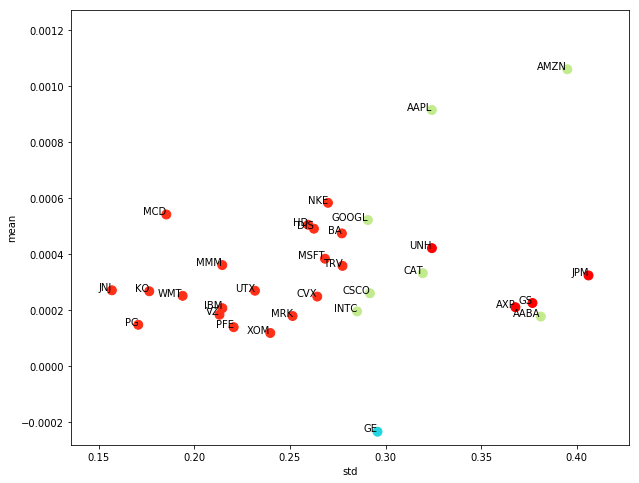

In [32]:
# The different groups of stocks are shown in their mean and volatility per year
fig = meanstd_returns2.plot.scatter(x='std',y='mean',color=colors,s=80,figsize=(10,8))
fig.set_ylim(1.2*meanstd_returns2.min()[0],1.2*meanstd_returns2.max()[0])
for i, txt in enumerate(meanstd_returns2.index):
    fig.annotate(txt, (meanstd_returns2['std'][i],meanstd_returns2['mean'][i]),size=10, xytext=(0,0), ha='right', textcoords='offset points')

# Spectral Clustering

In [33]:
# We perform the clustering with the spectral clustering method

In [34]:
from sklearn.cluster import SpectralClustering

In [35]:
# Function for evaluating the clustering performance
def SpectralCluster_Cluster_size_evaluation(Cluster_size,data):
    silhouette=[]
    sample_size=5000
    for i in Cluster_size:
        model=SpectralClustering(n_clusters=i,gamma=.05)
        model.fit(data)
        # Silhouette Score
        silhouette.append(metrics.silhouette_score(data, model.labels_,metric='euclidean',sample_size=sample_size))
    return silhouette

In [36]:
SC_silhouette=SpectralCluster_Cluster_size_evaluation(Cluster_size,scale_returns)

C:\Users\HoT\Anaconda3_2\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [37]:
# Functino for plotting the clustering performance
def SpectralCluster_plotting_Cluster_size_evaluation(silhouette):
    plt.figure(figsize=(8,6))
    plt.plot(Cluster_size,silhouette)
    plt.scatter(Cluster_size,silhouette)
    plt.title("Silhoutte Score")
    plt.ylabel("Silhoutte Score")
    plt.xlabel("Cluster Size")
    plt.tight_layout()

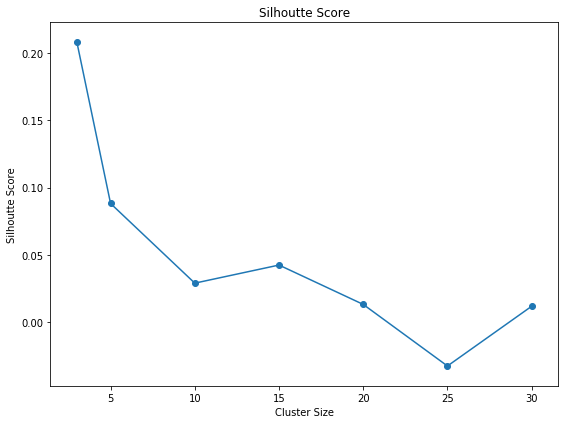

In [38]:
SpectralCluster_plotting_Cluster_size_evaluation(SC_silhouette)

In [39]:
model=KMeans(n_clusters=5)
model.fit(meanstd_returns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
SC_new_label = model.predict(scale_returns)

In [41]:
SC_new_label

array([1, 1, 1, 4, 0, 1, 1, 0, 0, 2, 1, 4, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0])

In [42]:
colors = cm.rainbow(SC_new_label*80)

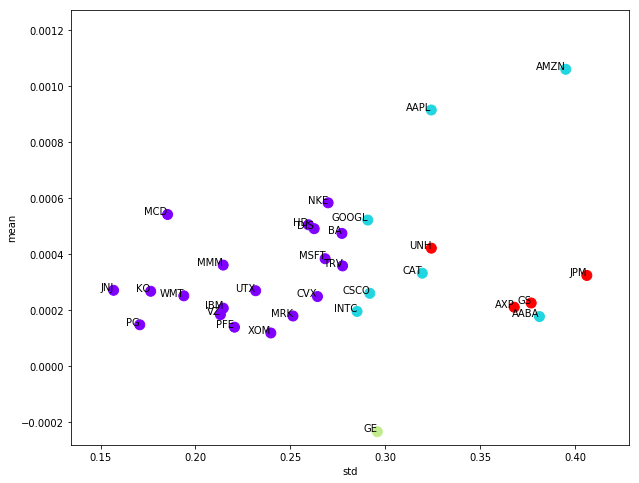

In [43]:
# Function for evaluating the clustering performance
fig = meanstd_returns2.plot.scatter(x='std',y='mean',color=colors,s=100,figsize=(10,8))
fig.set_ylim(1.2*meanstd_returns2.min()[0],1.2*meanstd_returns2.max()[0])
for i, txt in enumerate(meanstd_returns2.index):
    fig.annotate(txt, (meanstd_returns2['std'][i],meanstd_returns2['mean'][i]),size=10, xytext=(0,0), ha='right', textcoords='offset points')

# Graph resprentation based on correlations

In [44]:
correlations=returns.corr()

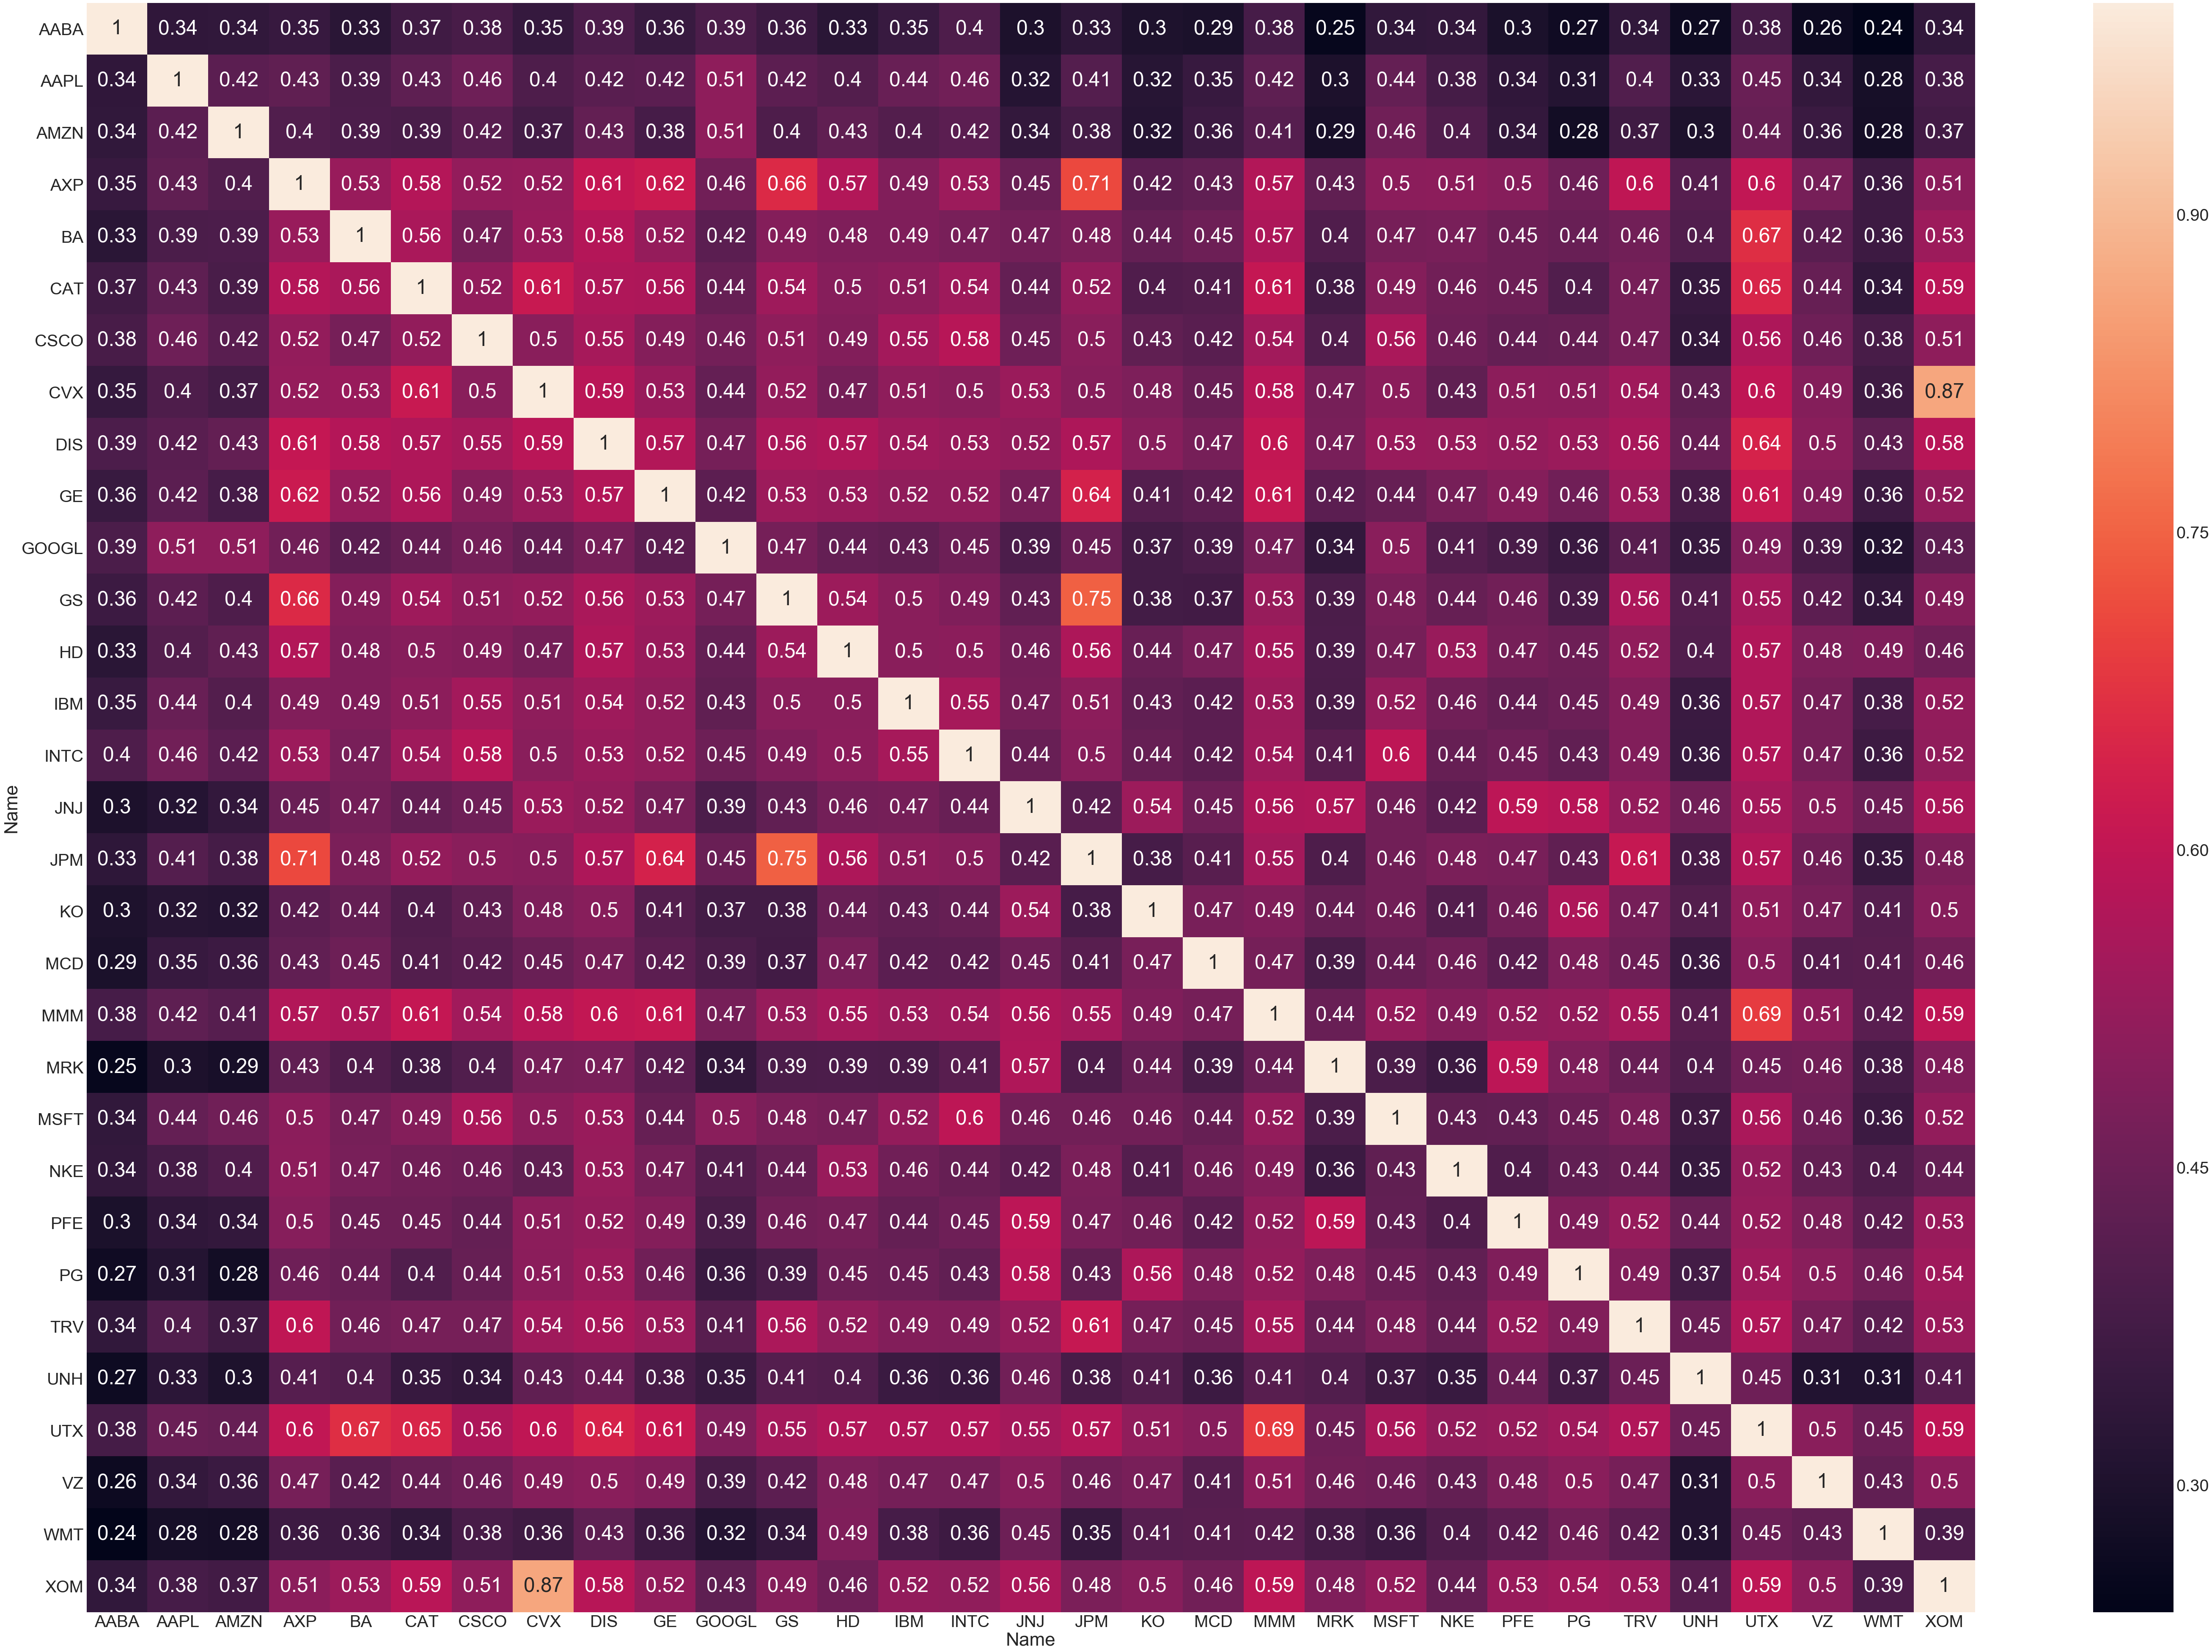

In [45]:
import seaborn as sns
sns.set(font_scale=4)
plt.figure(figsize=(100,70))
ax = sns.heatmap(correlations,annot=True)

In [46]:
import networkx as nx

In [47]:
# Plot setting:
SIZE1 = 20
SIZE2 = 24
SIZE3 = 30

plt.rc('font', size=SIZE1)          # controls default text sizes
plt.rc('axes', titlesize=SIZE1)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE2)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE1)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE1)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE1)    # legend fontsize
plt.rc('figure', titlesize=SIZE3)  # fontsize of the figure title

In [48]:
F = nx.Graph()

In [49]:
for i in range(len(correlations.columns)):
    for j in range(i+1,len(correlations.columns)):
        if (correlations.iloc[i,j]>.5):
            F.add_edge(correlations.columns[i],correlations.columns[j],weight=correlations.iloc[i,j])

In [50]:
elarge=[(u,v) for (u,v,d) in F.edges(data=True) if d['weight'] >0.6]
emedium=[(u,v) for (u,v,d) in F.edges(data=True) if d['weight'] >=0.56 and d['weight'] <0.6]
emedium2=[(u,v) for (u,v,d) in F.edges(data=True) if d['weight'] >=0.52 and d['weight'] <0.56]
esmall=[(u,v) for (u,v,d) in F.edges(data=True) if d['weight'] <0.52]

In [51]:
pos=nx.spring_layout(F)

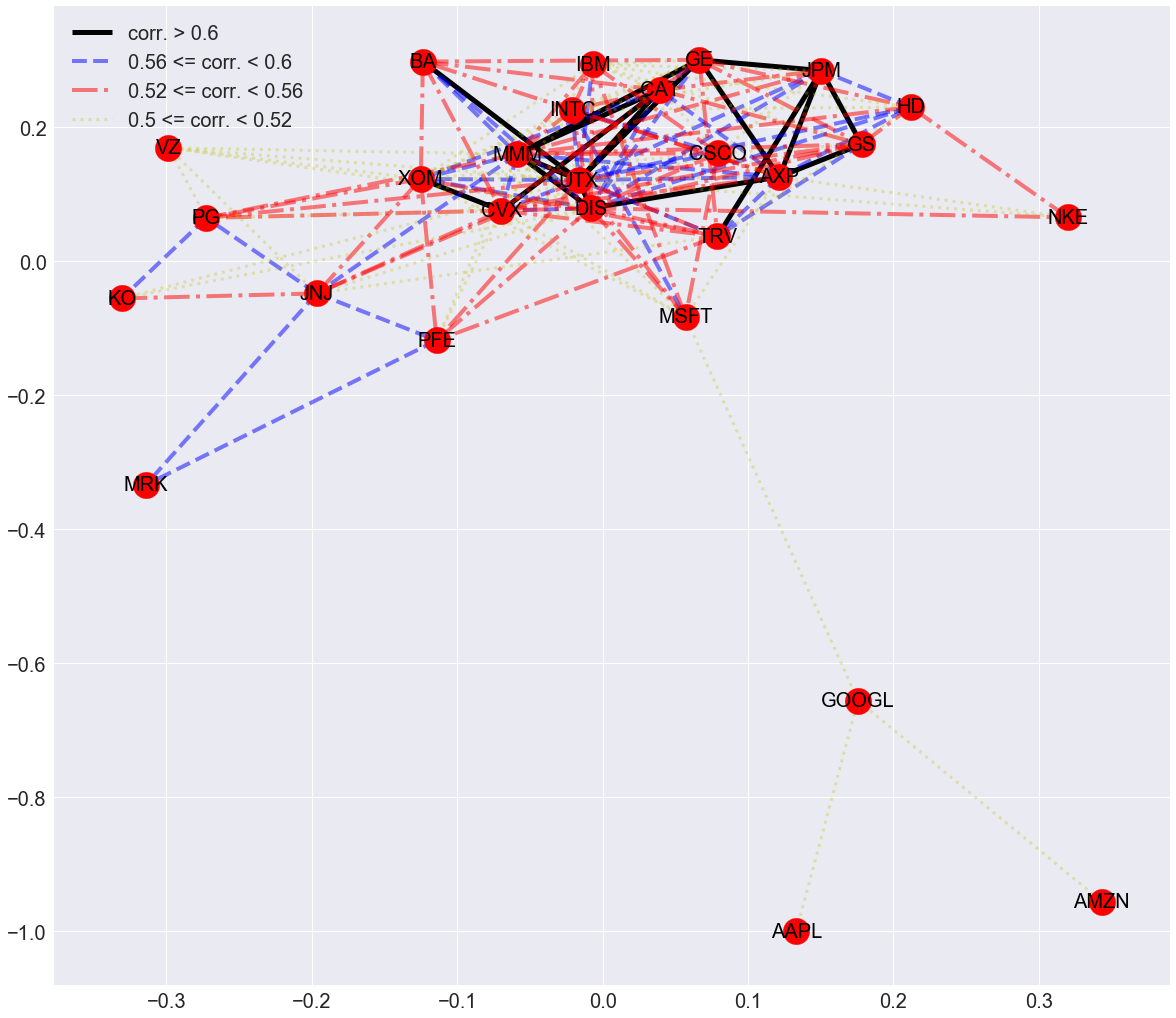

In [52]:
plt.figure(figsize=(20,18))
nx.draw_networkx_nodes(F,pos,node_size=700)
nx.draw_networkx_edges(F,pos,edgelist=elarge,
                    width=5,label='corr. > 0.6')
nx.draw_networkx_edges(F,pos,edgelist=emedium,
                    width=4,alpha=0.5,edge_color='b',style='dashed',label='0.56 <= corr. < 0.6 ')
nx.draw_networkx_edges(F,pos,edgelist=emedium2,
                    width=4,alpha=0.5,edge_color='r',style='dashdot',label='0.52 <= corr. < 0.56')
nx.draw_networkx_edges(F,pos,edgelist=esmall,
                    width=3,alpha=0.3,edge_color='y',style='dotted',label='0.5 <= corr. < 0.52')
# labels
nx.draw_networkx_labels(F,pos,font_size=20,font_family='sans-serif')
plt.legend(numpoints = 1,loc=2)
plt.show()